In [ ]:
from google.colab import drive,files
drive.mount('/content/Drive')


Mounted at /content/Drive


In [ ]:
!ls
%cd /content/Drive/MyDrive/face_recognization
!ls

Drive  sample_data
/content/Drive/MyDrive/face_recognization
faces


In [ ]:
!pip install face-recognition

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.1/100.1 MB 8.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566164 sha256=14894d54dfa72d3a79e50d54529c179d295fc87067c0448a2db8f1e08cf10b56
  Stored in directory: /root/.cache/pip/wheels/7a/eb/cf/e9eced74122b679557f597bb7c8e4c739cfcac526db1fd523d
Successfully built face-recognition-models


['faces/Akshat', 'faces/Vaibhav', 'faces/Vidisha', 'faces/Vivek'] <<<<<<<<<<<<<>>>>>>>>>>>>>>>> ['Akshat', 'Vaibhav', 'Vidisha', 'Vivek']
faces/Akshat/2834a649-f1e4-484a-bc75-38feb58cadbe.jpg
faces/Akshat/38da3f3f-a6dc-4469-87a4-7ef464dfe534.jpg
faces/Vaibhav/WhatsApp Image 2023-10-17 at 23.36.13_551bfe45.jpg
faces/Vaibhav/WhatsApp Image 2023-10-17 at 23.36.14_5f0bb434.jpg
faces/Vaibhav/WhatsApp Image 2023-10-18 at 22.52.58_f792f9ee.jpg
faces/Vidisha/WhatsApp Image 2023-10-18 at 23.05.50_c41333fc.jpg
faces/Vidisha/WhatsApp Image 2023-10-18 at 23.05.54_f28c2a69.jpg
faces/Vidisha/WhatsApp Image 2023-10-18 at 23.05.55_2a5be089.jpg
faces/Vidisha/WhatsApp Image 2023-10-18 at 23.05.55_c161393c.jpg
faces/Vivek/WhatsApp Image 2023-10-24 at 00.12.34_2ca91868.jpg
faces/Vivek/WhatsApp Image 2023-10-24 at 00.16.12_b90b2ded.jpg
year: 2025
month: 06
day: 05
C:\Users\vaibh\Desktop\j.jpg <<<<<<<<<<<<<<<<<<<<<<<
***************** AxesImage(shape=(1600, 1200, 3)) <<<>>> ['Vaibhav'] <<<>>> 0


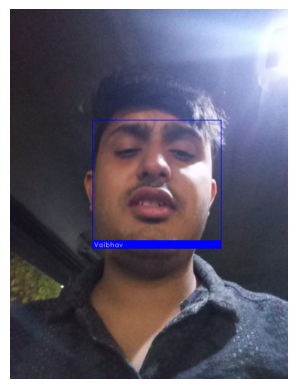

In [11]:
import matplotlib.pyplot as plt
from face_recognition.api import face_encodings
from IPython.utils import encoding
import cv2
import numpy as np
#from google.colab.patches import cv2_imshow
import face_recognition,os
def get_date_str()->(str):
    from datetime import datetime

    now = datetime.now() # current date and time

    year = now.strftime("%Y")
    print("year:", year)

    month = now.strftime("%m")
    print("month:", month)

    day = now.strftime("%d")
    print("day:", day)
    return f"{day}-{month}-{year}"
def register_face()->(list):
    names = os.listdir('faces') #to save the names
    faces = ['faces/'+face for face in names ]
    print(faces,"<<<<<<<<<<<<<>>>>>>>>>>>>>>>>",names)
    return faces
def encode_faces(faces: list):
    faces_encoding = [] #to save the encodings of the photos
    extended_names=[]
    for face in faces:
        sub_image_dir_names = os.listdir(face) #TO GET INSIDE THE DIRECTORY OF THE KNOWN FACES TO GET THE IMAGES
        for image in sub_image_dir_names:
            extended_names.append(face.split('/')[-1]) #TO SAVE THE NAMES MULTIPLE TIMES FOR EACH PHOTO
            print(f'{face}/{image}') #faces/Vidisha/WhatsApp Image 2023-10-18 at 23.05.50_c41333fc.jpg
            face_image = face_recognition.load_image_file(f'{face}/{image}')
            faces_encoding.append(face_recognition.face_encodings(face_image)[0])
    return faces_encoding,extended_names
faces=register_face()
#print(faces)
known_encoded_faces,names = encode_faces(faces=faces)#[[person1_pic1_enc,person1_pic2_enc],[person2_pic1_enc,person1_pic12_enc]]
date = get_date_str()
# uploaded = files.upload()
# file_name = list(uploaded.keys())[0]
file_name = r"C:\Users\vaibh\Desktop\j.jpg"
print(file_name,"<<<<<<<<<<<<<<<<<<<<<<<")
img = cv2.imread(file_name)
plt.imshow(img)
plt.axis('off')


def recognize_face(file_name,names,known_encoded_faces):
  name_list_of_persent_student =[]
  unknown_count=0
  unknown_faces_image=face_recognition.load_image_file(file_name)
  face_locations = face_recognition.face_locations(unknown_faces_image)
  face_encoding = face_recognition.face_encodings(unknown_faces_image, face_locations)
  for (top, right, bottom, left), face_encoding in zip(face_locations, face_encoding):
        # See if the face is a match for the known face(s)
        matches = face_recognition.compare_faces(known_encoded_faces, face_encoding)
        name = "Unknown"
        face_distances = face_recognition.face_distance(known_encoded_faces, face_encoding)
        best_match_index = np.argmin(face_distances) #shortest distance betwwen the known encoded faces and unknown faces
        if matches[best_match_index]:
            name = names[best_match_index]
        cv2.rectangle(unknown_faces_image, (left, top), (right, bottom), (0, 0, 255), 2)

        # Draw a label with a name below the face
        cv2.rectangle(unknown_faces_image, (left, bottom - 35), (right, bottom), (0, 0, 255), cv2.FILLED)
        font = cv2.FONT_HERSHEY_DUPLEX
        cv2.putText(unknown_faces_image, name, (left + 6, bottom - 6), font, 1.0, (255, 255, 255), 1)
        #unknown_count = unknown_count + 1 if name == "Unknown" else name_list_of_persent_student.append(name)
        if name == "Unknown":
          unknown_count += 1
        else:
          name_list_of_persent_student.append(name)



  return unknown_faces_image,name_list_of_persent_student,unknown_count

unknown_faces_image,name_list_of_persent_student,unknown_count = recognize_face(file_name,names,known_encoded_faces)
print("*****************",plt.imshow(unknown_faces_image),"<<<>>>",name_list_of_persent_student,"<<<>>>",unknown_count)









Adding The Attendence TO The Sheet


In [ ]:
 from google.colab import auth
 auth.authenticate_user()

import gspread
from google.auth import default
creds, _ = default()

gc = gspread.authorize(creds)

worksheet = gc.open('FIP_Attendence').sheet1

# get_all_values gives a list of rows.
rows = worksheet.get_all_values()
print(rows)

# Convert to a DataFrame and render.
import pandas as pd
df= pd.DataFrame.from_records(rows)
df

[['Name', 'PRN', 'Email', '25-10-2023', '26-10-2023', '27-10-2023', '28-10-2023', '29-10-2023', '30-10-2023', '31-10-2023'], ['Vaibhav', '22070126126', 'proedge372@gmail.com', '1', '0', '1', '1', '1', '', ''], ['Shailesh', '22070126124', 'proedge372@gmail.com', '0', '0', '0', '0', '0', '', ''], ['Vivek', '22070126133', 'proedge372@gmail.com', '0', '0', '1', '1', '1', '', ''], ['Unnati', '22070126138', 'proedge372@gmail.com', '0', '0', '0', '0', '0', '', ''], ['Sargam', '22070126111', 'proedge372@gmail.com', '0', '0', '0', '0', '0', '', ''], ['Akshat', '22070126135', 'proedge372@gmail.com', '0', '1', '1', '1', '1', '', ''], ['Vidisha', '22070126131', 'proedge372@gmail.com', '1', '0', '0', '1', '1', '', '']]


,0,1,2,3,4,5,6,7,8,9
0,Name,PRN,Email,25-10-2023,26-10-2023,27-10-2023,28-10-2023,29-10-2023,30-10-2023,31-10-2023
1,Vaibhav,22070126126,proedge372@gmail.com,1,0,1,1,1,,
2,Shailesh,22070126124,proedge372@gmail.com,0,0,0,0,0,,
3,Vivek,22070126133,proedge372@gmail.com,0,0,1,1,1,,
4,Unnati,22070126138,proedge372@gmail.com,0,0,0,0,0,,
5,Sargam,22070126111,proedge372@gmail.com,0,0,0,0,0,,
6,Akshat,22070126135,proedge372@gmail.com,0,1,1,1,1,,
7,Vidisha,22070126131,proedge372@gmail.com,1,0,0,1,1,,


In [ ]:
date

'28-07-2024'

In [ ]:
name_list_of_persent_student

['Vaibhav', 'Vivek', 'Akshat', 'Vidisha']

In [ ]:
if df.columns.tolist() != date:

  number=df.columns.tolist()
  print(type(number))
  print(number[-1])
  num=number[-1]+1
  df.loc[:,num] = 0
  df.iat[0,num]=date
df.head(2)

<class 'list'>
9


,0,1,2,3,4,5,6,7,8,9,10
0,Name,PRN,Email,25-10-2023,26-10-2023,27-10-2023,28-10-2023,29-10-2023,30-10-2023,31-10-2023,28-07-2024
1,Vaibhav,22070126126,proedge372@gmail.com,1,0,1,1,1,,,0


In [ ]:
print(df.columns)

Index([0, 1, 2, 3, 4, 5, 6, 7, '29-07-2004'], dtype='object')


In [ ]:
#take list of column names in the dataframe
column_names=list(df.iloc[0,0:])
#take the list of all names present in the dataframe
nm=list(df.iloc[1:,0])
#get all the dates in the dataframe
dates=list(column_names[2:])
nm

['Vaibhav', 'Shailesh', 'Vivek', 'Unnati', 'Sargam', 'Akshat', 'Vidisha']

In [ ]:
col=[]

_,col=(df == date).values.nonzero() #ONLY COLUMN USED
print(col)
for i in nm:
  if i in name_list_of_persent_student:
    row,_= (df == i).values.nonzero() #ONLY ROW USED
    print(row,col)



    df.iat[int(row),int(col)]=1
  else:
    row,_= (df == i).values.nonzero()
    df.iat[int(row),int(col)]=0
df.head(10)




[10]
[1] [10]
[3] [10]
[6] [10]
[7] [10]


<ipython-input-154-2b66ff7961a3>:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  df.iat[int(row),int(col)]=1
<ipython-input-154-2b66ff7961a3>:15: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  df.iat[int(row),int(col)]=0


,0,1,2,3,4,5,6,7,8,9,10
0,Name,PRN,Email,25-10-2023,26-10-2023,27-10-2023,28-10-2023,29-10-2023,30-10-2023,31-10-2023,28-07-2024
1,Vaibhav,22070126126,proedge372@gmail.com,1,0,1,1,1,,,1
2,Shailesh,22070126124,proedge372@gmail.com,0,0,0,0,0,,,0
3,Vivek,22070126133,proedge372@gmail.com,0,0,1,1,1,,,1
4,Unnati,22070126138,proedge372@gmail.com,0,0,0,0,0,,,0
5,Sargam,22070126111,proedge372@gmail.com,0,0,0,0,0,,,0
6,Akshat,22070126135,proedge372@gmail.com,0,1,1,1,1,,,1
7,Vidisha,22070126131,proedge372@gmail.com,1,0,0,1,1,,,1


In [ ]:
import smtplib

server = smtplib.SMTP('smtp.gmail.com',587)

server.starttls()


server.login('vaibhavuniyal10@gmail.com','smkawbpfgquvtgpg')



(235, b'2.7.0 Accepted')

In [ ]:
for i in nm:
  if i in name_list_of_persent_student:
    row,cl= (df == i).values.nonzero() #ONLY ROW USED
    r,c =(df == "Email").values.nonzero()
    # print(r,c)
    # print(row,cl)
    subject="Regarding Present in Lecture."
    message=f"{i} you were present in the FIP Lecture Today."
    email=df.iat[int(row),int(c)]
    # print(email)
    message = "Subject:{}\n\n{}".format(subject,message)
   #  server.sendmail('vaibhavuniyal10@gmail.com',email,message)
  else:
      row,cl= (df == i).values.nonzero() #ONLY ROW USED
      r,c =(df == "Email").values.nonzero()
      # print(r,c)
      # print(row,cl)
      subject="Regarding Absent in Lecture."
      message=f"{i} you were absent in the FIP Lecture Today."
      email=df.iat[int(row),int(c)]
      # print(email)
      message = "Subject:{}\n\n{}".format(subject,message)
     # server.sendmail('vaibhavuniyal10@gmail.com',email,message)

<ipython-input-101-b3d3cd02ef66>:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  email=df.iat[int(row),int(c)]
<ipython-input-101-b3d3cd02ef66>:20: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  email=df.iat[int(row),int(c)]


In [ ]:
data = df.values.tolist()


In [ ]:
# Open the existing Google Sheet by title
sheet = gc.open('FIP_Attendence').sheet1

# Update the data starting from a specific cell
sheet.update('A1', data)


<ipython-input-156-ee12055882ae>:5: DeprecationWarning: The order of arguments in worksheet.update() has changed. Please pass values first and range_name secondor used named arguments (range_name=, values=)
  sheet.update('A1', data)


{'spreadsheetId': '1YhU1CmpDlFX3sRSnBfO7FUvjxryQfM-1phG7r4kQ3qI',
 'updatedRange': 'Sheet1!A1:K8',
 'updatedRows': 8,
 'updatedColumns': 11,
 'updatedCells': 88}